# Tarea SLA ICGG

In [ ]:
from scipy.stats import kstest
from scipy.stats import wilcoxon


# 1. Pruebe si la media de las notas de escritura es significativamente diferente de 70. Verifique los supuestos de la prueba paramétrica, y si no se cumplen haga la prueba no paramétrica.

In [27]:
ks_test_writing = kstest(df['writing_score'], cdf='norm')
print(f'p-value de la prueba de normalidad para las notas de escritura: {ks_test_writing.pvalue}')

p-value de la prueba de normalidad para las notas de escritura: 0.0


<Axes: >

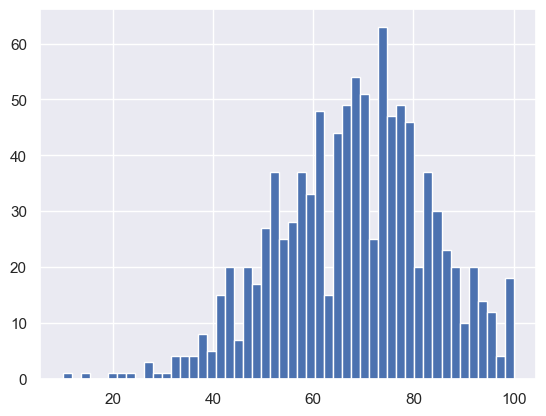

In [34]:
df['writing_score'].hist(bins=50)

La distribucion no es normal

In [31]:
p_val_writing = wilcoxon(x=df['writing_score'] - 70, alternative='less').pvalue
print(f'p-value de Wilcoxon para las notas de escritura: {p_val_writing}')

p-value de Wilcoxon para las notas de escritura: 0.0005946478568044117


Si hay diferencias significativa

# 2. Pruebe si hay diferencias significativas en las notas de escritura y lectura. Verifique los supuestos de la prueba paramétrica, y si no se cumplen haga la prueba no paramétrica.

In [35]:
diferencias = df['writing_score'] - df['reading_score']
ks_test_diferencias = kstest(diferencias, cdf='norm')
print(f'p-value de la prueba de normalidad para las diferencias entre las notas de escritura y lectura: {ks_test_diferencias.pvalue}')

p-value de la prueba de normalidad para las diferencias entre las notas de escritura y lectura: 8.732895237416454e-191


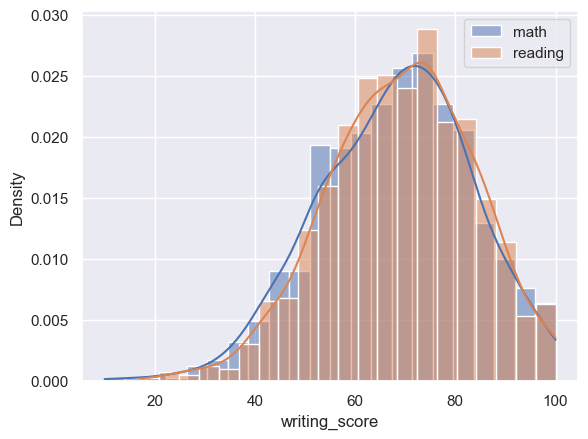

In [40]:
sns.histplot(df['writing_score'], kde=True, stat='density', label='math')
sns.histplot(df['reading_score'], kde=True, stat='density', label='reading')
plt.legend()

In [41]:
from scipy.stats import kstest
from scipy.stats import levene
ks_math = kstest(df['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para la muestra matemáticas: {ks_math.pvalue}')
ks_reading = kstest(df['reading_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para la muestra lectura: {ks_reading.pvalue}')
p_levene = levene(df['writing_score'], df['reading_score']).pvalue
print(f'p-value para test de igual varianza: {p_levene:.3f}')

p-value de la prueba de normalidad para la muestra matemáticas: 0.0
p-value de la prueba de normalidad para la muestra lectura: 0.0
p-value para test de igual varianza: 0.291


Las muestras no son normales, pero se ve que tienen igual varianza

In [45]:
from scipy.stats import ttest_rel
ttest_rel(df['reading_score'], df['writing_score'], alternative='greater').pvalue

8.527375473052693e-15

In [46]:
p_val_diferencias = wilcoxon(df['reading_score'], df['writing_score'], alternative='two-sided').pvalue
print(f'p-value de la prueba no paramétrica de Wilcoxon para las diferencias entre las notas de escritura y lectura: {p_val_diferencias}')

p-value de la prueba no paramétrica de Wilcoxon para las diferencias entre las notas de escritura y lectura: 3.819560484150749e-14


Si hay diferencias significativas

# 3. Pruebe si hay diferencias significativas en las notas de escritura, por niveles del factor 'test_preparation_course'. Verifique los supuestos de la prueba paramétrica, y si no se cumplen haga la prueba no paramétrica.

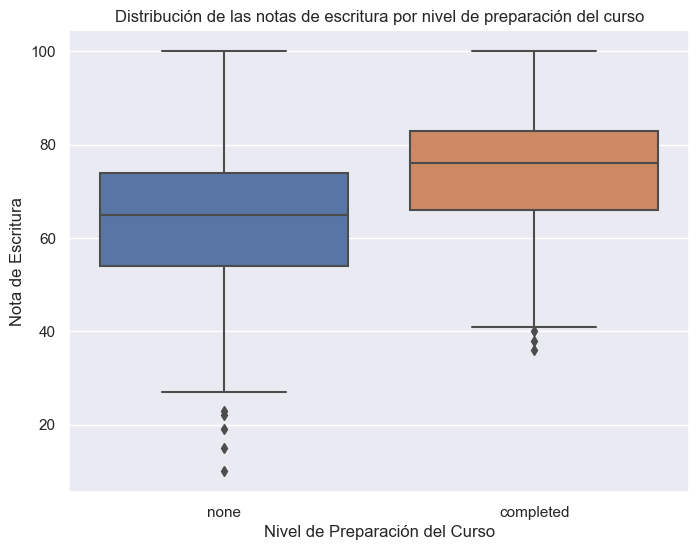

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='test_preparation_course', y='writing_score', data=df)
plt.title('Distribución de las notas de escritura por nivel de preparación del curso')
plt.xlabel('Nivel de Preparación del Curso')
plt.ylabel('Nota de Escritura')
plt.show()

In [48]:
from scipy.stats import levene

levene_test = levene(notas_escritura_none, notas_escritura_completed)
print(f'p-value para la prueba de Levene de homogeneidad de varianza: {levene_test.pvalue}')


p-value para la prueba de Levene de homogeneidad de varianza: 0.01471666446790565


In [49]:
from scipy.stats import kruskal

p_val_anova = kruskal(notas_escritura_none, notas_escritura_completed).pvalue
print(f'p-value del test de Kruskal-Wallis para diferencias en las notas de escritura según el nivel de preparación del curso: {p_val_anova}')


p-value del test de Kruskal-Wallis para diferencias en las notas de escritura según el nivel de preparación del curso: 1.1694196471440041e-23


Vemos que si hay diferencia significativa 

# 4. Pruebe si hay diferencias en las frecuencias de los niveles de 'lunch' por niveles de 'parental_level_of_education'.

In [51]:
cont =  pd.crosstab(df['lunch'], df['parental_level_of_education'])
cont

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
lunch,,,,,,
free/reduced,77,44,70,24,79,61
standard,145,74,126,35,147,118


In [52]:
p_val = chi2_contingency(pd.crosstab(df['lunch'], df['parental_level_of_education'])).pvalue
print(f'El p-value de esta prueba es {p_val}')

El p-value de esta prueba es 0.9531014927218224


No hay diferencias significativas

# 5. Pruebe si hay diferencias en las notas de escritura por niveles de 'parental_level_of_education'. Verifique los supuestos de la prueba paramétrica, y si no se cumplen haga la prueba no paramétrica. Si es del caso, haga pruebas post-hoc.

<Axes: xlabel='parental_level_of_education', ylabel='writing_score'>

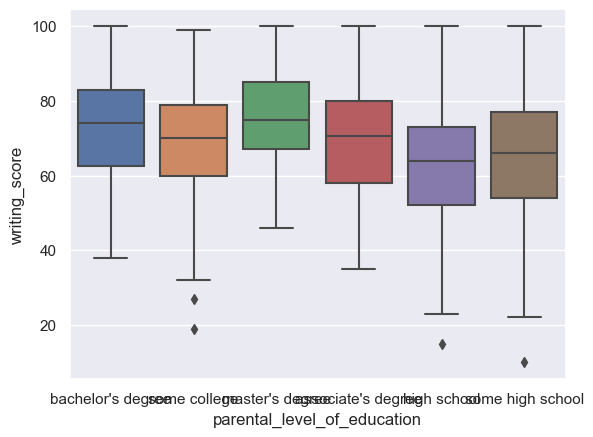

In [58]:
sns.boxplot(data=df, x = 'parental_level_of_education', y = 'writing_score')

<Axes: xlabel='parental_level_of_education', ylabel='writing_score'>

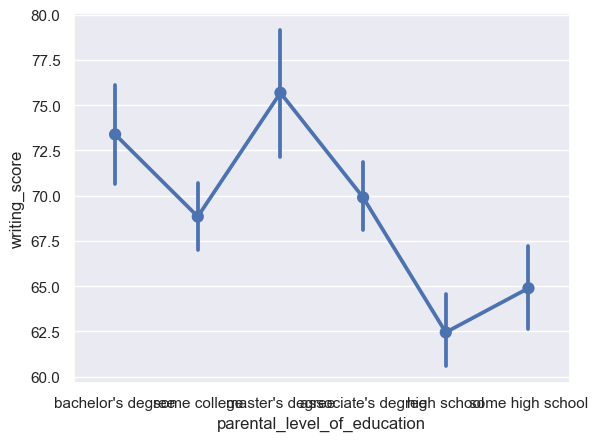

In [60]:
sns.pointplot(data = df, x = 'parental_level_of_education', y= 'writing_score', errorbar = 'ci')

In [80]:
from scipy.stats import tukey_hsd
res = tukey_hsd(df[df['parental_level_of_education'] == "bachelor's degree"]['writing_score'],
                df[df['parental_level_of_education'] == "some college"]['writing_score'],
                df[df['parental_level_of_education'] == "high school"]['writing_score'],
                df[df['parental_level_of_education'] == "some high school"]['writing_score'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      4.541     0.037     0.181     8.900
 (0 - 2)     10.932     0.000     6.460    15.405
 (0 - 3)      8.493     0.000     3.942    13.045
 (1 - 0)     -4.541     0.037    -8.900    -0.181
 (1 - 2)      6.392     0.000     2.645    10.138
 (1 - 3)      3.952     0.041     0.112     7.793
 (2 - 0)    -10.932     0.000   -15.405    -6.460
 (2 - 1)     -6.392     0.000   -10.138    -2.645
 (2 - 3)     -2.439     0.389    -6.408     1.529
 (3 - 0)     -8.493     0.000   -13.045    -3.942
 (3 - 1)     -3.952     0.041    -7.793    -0.112
 (3 - 2)      2.439     0.389    -1.529     6.408



Existen diferencias significativas en algunos grupos

In [75]:
from scipy.stats import kstest
from scipy.stats import levene
ks_A = kstest(df[df['parental_level_of_education'] == "bachelor's degree"]['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para bachelors degree ": {ks_A.pvalue}')
ks_B = kstest(df[df['parental_level_of_education'] == 'some college']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para some college: {ks_B.pvalue}')
ks_C = kstest(df[df['parental_level_of_education'] == "master's degree"]['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para masters degree: {ks_C.pvalue}')
ks_D = kstest(df[df['parental_level_of_education'] == "associate's degree"]['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para associates degree :{ks_D.pvalue}')
ks_E = kstest(df[df['parental_level_of_education'] == 'high school']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para high school: {ks_E.pvalue}')
ks_E = kstest(df[df['parental_level_of_education'] == 'some high school']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para some high school: {ks_E.pvalue}')

p_levene = levene(df[df['parental_level_of_education'] == "bachelor's degree"]['writing_score'],df[df['parental_level_of_education'] == 'some college']['writing_score'],
df[df['parental_level_of_education'] == "master's degree"]['writing_score'],df[df['parental_level_of_education'] == "associate's degree"]['writing_score'],
df[df['parental_level_of_education'] == 'high school']['writing_score'],df[df['parental_level_of_education'] == "some high school"]['writing_score']).pvalue
print(f'p-value para test de homocedasticidad: {p_levene:.3f}')

p-value de la prueba de normalidad para bachelors degree ": 0.0
p-value de la prueba de normalidad para some college: 0.0
p-value de la prueba de normalidad para masters degree: 0.0
p-value de la prueba de normalidad para associates degree :0.0
p-value de la prueba de normalidad para high school: 0.0
p-value de la prueba de normalidad para some high school: 0.0
p-value para test de homocedasticidad: 0.628


In [79]:
from scipy.stats import kruskal
kruskal(df[df['parental_level_of_education'] == "bachelor's degree"]['writing_score'],df[df['parental_level_of_education'] == 'some college']['writing_score'],
df[df['parental_level_of_education'] == "master's degree"]['writing_score'],df[df['parental_level_of_education'] == "associate's degree"]['writing_score'],
df[df['parental_level_of_education'] == 'high school']['writing_score'],df[df['parental_level_of_education'] == "some high school"]['writing_score']).pvalue

4.006144326877935e-12

# 6. Pruebe si hay diferencias en las notas de escritura por niveles de 'race_ethnicity'. Verifique los supuestos de la prueba paramétrica, y si no se cumplen haga la prueba no paramétrica. Si es del caso, haga pruebas post-hoc.


<Axes: xlabel='race_ethnicity', ylabel='writing_score'>

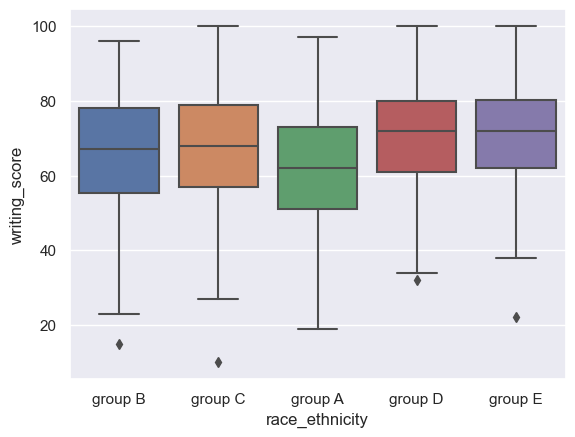

In [73]:
sns.boxplot(data=df, x = 'race_ethnicity', y = 'writing_score')

<Axes: xlabel='race_ethnicity', ylabel='writing_score'>

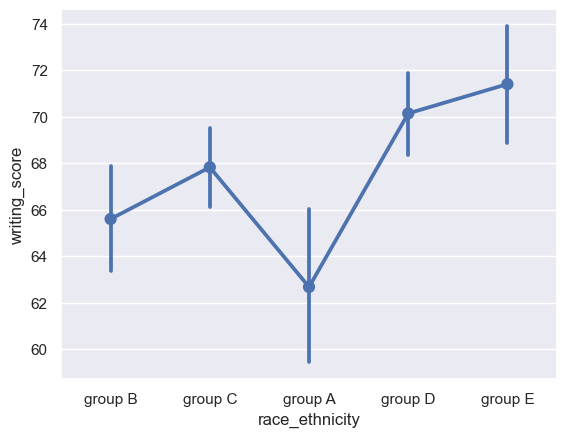

In [74]:
sns.pointplot(data = df, x = 'race_ethnicity', y= 'writing_score', errorbar = 'ci')

In [69]:
from scipy.stats import tukey_hsd
res = tukey_hsd(df[df['race_ethnicity'] == 'group A']['writing_score'],df[df['race_ethnicity'] == 'group B']['writing_score'],
            df[df['race_ethnicity'] == 'group C']['writing_score'],df[df['race_ethnicity'] == 'group D']['writing_score'],
            df[df['race_ethnicity'] == 'group E']['writing_score'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.926     0.551    -8.195     2.344
 (0 - 2)     -5.153     0.035   -10.071    -0.236
 (0 - 3)     -7.471     0.001   -12.504    -2.438
 (0 - 4)     -8.733     0.000   -14.294    -3.171
 (1 - 0)      2.926     0.551    -2.344     8.195
 (1 - 2)     -2.228     0.485    -5.987     1.532
 (1 - 3)     -4.545     0.013    -8.454    -0.636
 (1 - 4)     -5.807     0.005   -10.376    -1.238
 (2 - 0)      5.153     0.035     0.236    10.071
 (2 - 1)      2.228     0.485    -1.532     5.987
 (2 - 3)     -2.317     0.345    -5.738     1.103
 (2 - 4)     -3.580     0.130    -7.738     0.579
 (3 - 0)      7.471     0.001     2.438    12.504
 (3 - 1)      4.545     0.013     0.636     8.454
 (3 - 2)      2.317     0.345    -1.103     5.738
 (3 - 4)     -1.262     0.930    -5.557     3.033
 (4 - 0)      8.733     0.000     3.171    14.294
 (4 - 1)      5.807     0.005   

Existen diferencias significativas

In [68]:
ks_test_groupA = kstest(df[df['race_ethnicity'] == 'group A']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para el grupo A: {ks_test_groupA.pvalue}')
ks_test_groupB = kstest(df[df['race_ethnicity'] == 'group B']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para el grupo B: {ks_test_groupB.pvalue}')
ks_test_groupC = kstest(df[df['race_ethnicity'] == 'group C']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para el grupo C: {ks_test_groupC.pvalue}')
ks_test_groupD = kstest(df[df['race_ethnicity'] == 'group D']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para el grupo D: {ks_test_groupD.pvalue}')
ks_test_groupE = kstest(df[df['race_ethnicity'] == 'group E']['writing_score'], cdf=norm.cdf)
print(f'p-value de la prueba de normalidad para el grupo E: {ks_test_groupE.pvalue}')

p_levene = levene(df[df['race_ethnicity'] == 'group A']['writing_score'],
                 df[df['race_ethnicity'] == 'group B']['writing_score'],
                 df[df['race_ethnicity'] == 'group C']['writing_score'],
                 df[df['race_ethnicity'] == 'group D']['writing_score'],
                 df[df['race_ethnicity'] == 'group E']['writing_score']).pvalue
print(f'p-value para test de homocedasticidad: {p_levene:.3f}') 

p-value de la prueba de normalidad para el grupo A: 0.0
p-value de la prueba de normalidad para el grupo B: 0.0
p-value de la prueba de normalidad para el grupo C: 0.0
p-value de la prueba de normalidad para el grupo D: 0.0
p-value de la prueba de normalidad para el grupo E: 0.0
p-value para test de homocedasticidad: 0.752


In [70]:
from scipy.stats import kruskal
kruskal(df[df['race_ethnicity'] == 'group A']['writing_score'],df[df['race_ethnicity'] == 'group B']['writing_score'],
            df[df['race_ethnicity'] == 'group C']['writing_score'],df[df['race_ethnicity'] == 'group D']['writing_score'],
            df[df['race_ethnicity'] == 'group E']['writing_score']).pvalue

2.3849560098345994e-05